## Import and Prepare Data

In [15]:
import pandas as pd
import glob
import os

# Paths to the folders containing CSV files
folder_path_664C = "/home/scohail/Desktop/LowCast_AI-Simulation/Data/Data_664C"
folder_path_720C = "/home/scohail/Desktop/LowCast_AI-Simulation/Data/Data_720C"
folder_path_614C = "/home/scohail/Desktop/LowCast_AI-Simulation/Data/Data_614C"
folder_path_630C = "/home/scohail/Desktop/LowCast_AI-Simulation/Data/Data_630C"
folder_path_690C = "/home/scohail/Desktop/LowCast_AI-Simulation/Data/Data_690C"
folder_path_622C = "/home/scohail/Desktop/LowCast_AI-Simulation/Data/Data_622C" 
 





# Function to process files in a folder
def process_folder(folder_path, temp_int_value):
    # Get all CSV files in the folder
    csv_files = sorted(glob.glob(os.path.join(folder_path, "state*.csv")))

    # Initialize an empty DataFrame
    final_df = None

    for file in csv_files:
        # Extract the state number from the filename
        state_number = os.path.basename(file).replace("state", "").replace(".csv", "").lstrip("0")
        
        # Read CSV file
        df = pd.read_csv(file)

        # Filter rows where Z == -4.2632566e-15
        df_filtered = df[df["Z"] == -4.2632566e-15][["X", "Y", "Temperature(K)"]]

        # Rename temperature column to reflect the state number
        df_filtered.rename(columns={"Temperature(K)": f"TempState{state_number}"}, inplace=True)

        # Add the Temp_int column
        df_filtered["Temp_int"] = temp_int_value

        # Merge with the final DataFrame
        if final_df is None:
            final_df = df_filtered
        else:
            final_df = pd.merge(final_df, df_filtered, on=["X", "Y", "Temp_int"], how="outer")

    return final_df

# Process both folders
# final_df_664C = process_folder(folder_path_664C, 937)
# final_df_720C = process_folder(folder_path_720C, 993)
# final_df_614C = process_folder(folder_path_614C, 887)
# final_df_630C = process_folder(folder_path_630C, 903)
# final_df_690C = process_folder(folder_path_690C, 963)
final_df_622C = process_folder(folder_path_622C, 895)


#final_df_690C.to_csv("690C.csv", index=False)


# Concatenate the two DataFrames
# final_df = pd.concat([final_df_630C], ignore_index=True)



final_df = final_df_622C

print(final_df)
# final_df.to_csv("merged_temperatures_with_temp_int.csv", index=False)

             X          Y  TempState1  Temp_int  TempState251  TempState501  \
0    -3.323856   6.720222       895.0       895     884.35880     881.73680   
1    -3.305937   6.905824       895.0       895     883.60970     880.40560   
2    -3.300470   6.813534       895.0       895     884.29500     881.28490   
3    -3.299726   6.204810       895.0       895     885.10610     883.73834   
4    -3.294462   7.078054       895.0       895     881.77405     878.71130   
...        ...        ...         ...       ...           ...           ...   
4622  5.832240 -15.627687       895.0       895     884.80380     882.35380   
4623  5.833679 -15.924137       895.0       895     884.32740     881.26227   
4624  5.846610 -15.526989       895.0       895     884.58624     882.11550   
4625  5.846827 -15.426255       895.0       895     884.36570     881.86140   
4626  5.860583 -15.343610       895.0       895     883.93330     881.38410   

      TempState751  TempState1001  TempState1251  T

In [16]:
#load model

from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from joblib import load


scaler = load('/home/scohail/Desktop/LowCast_AI-Simulation/Scaler/scaler_2.pkl')
model = load_model('/home/scohail/Desktop/LowCast_AI-Simulation/Models/First_model_5.h5')




final_df_scaled = final_df.copy()
final_df_scaled.iloc[:, :] = scaler.transform(final_df_scaled.iloc[:, :])
print(final_df_scaled)

# Load the model from the .h5 file


X_test = final_df_scaled[['X', 'Y', 'Temp_int']]
y = final_df_scaled.drop(['X', 'Y' , 'Temp_int'], axis=1)


print(X_test.shape, y.shape)

             X         Y  TempState1  Temp_int  TempState251  TempState501  \
0     0.000000  0.953815    0.075472  0.075472      0.276286      0.429463   
1     0.001951  0.959714    0.075472  0.075472      0.271288      0.422603   
2     0.002546  0.956781    0.075472  0.075472      0.275860      0.427134   
3     0.002627  0.937434    0.075472  0.075472      0.281272      0.439779   
4     0.003200  0.965188    0.075472  0.075472      0.259040      0.413871   
...        ...       ...         ...       ...           ...           ...   
4622  0.996914  0.243522    0.075472  0.075472      0.279255      0.432643   
4623  0.997071  0.234100    0.075472  0.075472      0.276076      0.427018   
4624  0.998479  0.246723    0.075472  0.075472      0.277804      0.431415   
4625  0.998502  0.249924    0.075472  0.075472      0.276332      0.430106   
4626  1.000000  0.252551    0.075472  0.075472      0.273447      0.427646   

      TempState751  TempState1001  TempState1251  TempState1501

/tmp/ipykernel_59588/2123913688.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0754717 0.0754717 0.0754717 ... 0.0754717 0.0754717 0.0754717]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_df_scaled.iloc[:, :] = scaler.transform(final_df_scaled.iloc[:, :])


## Prediction of Scaled values

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


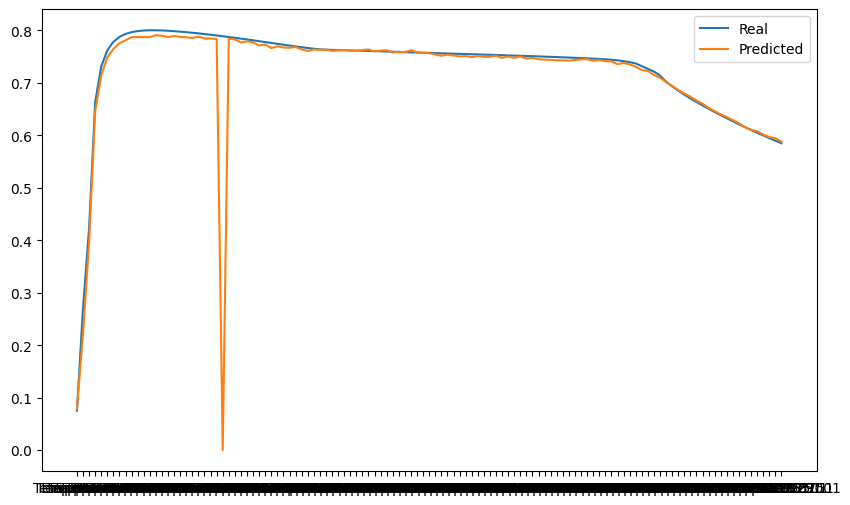

TempState1        0.081422
TempState251      0.280570
TempState501      0.442386
TempState751      0.680281
TempState1001     0.747762
                    ...   
TempState28001    0.609383
TempState28251    0.603674
TempState28501    0.599824
TempState28751    0.595757
TempState29001    0.589538
Name: 10, Length: 117, dtype: float32


In [43]:
# plot the results of the test data with the real data 
import matplotlib.pyplot as plt



y_pred = model.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=y.columns)

y = y.reset_index(drop=True)

plt.figure(figsize=(10, 6))

plt.plot(y.iloc[1], label='Real')
plt.plot(y_pred.iloc[1], label='Predicted')

plt.legend()

plt.show()

print(y_pred.iloc[10])

## Prediction of real values

TempState6001
361.32806


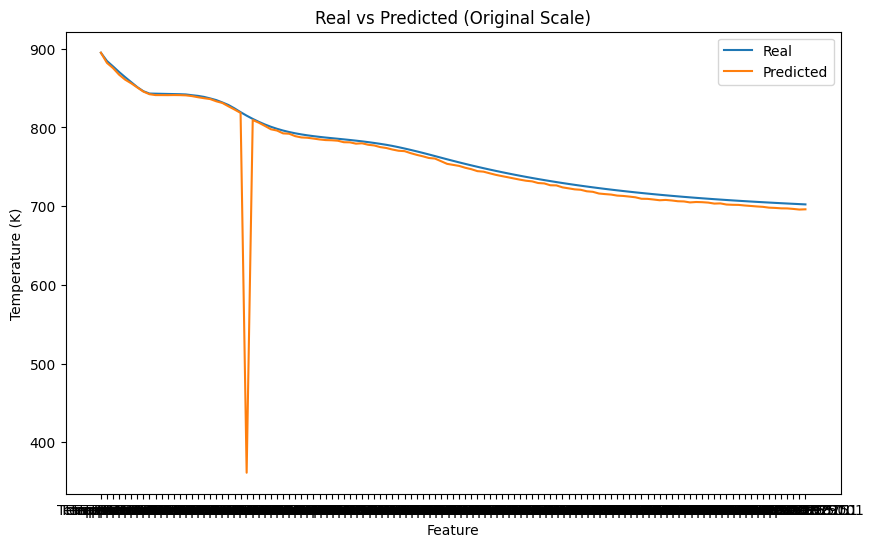

Retransformed Predicted Values (Original Scale):
TempState1        895.000000
TempState251      885.000913
TempState501      884.244299
TempState751      884.242882
TempState1001     884.082803
                     ...    
TempState28001    760.317304
TempState28251    757.124971
TempState28501    755.039328
TempState28751    752.828045
TempState29001    749.344655
Name: 10, Length: 117, dtype: float64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming `scaler` is the MinMaxScaler object used earlier
# Combine X_test and y_test back into a single DataFrame for inverse transform
test_data_scaled = pd.concat([X_test.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Retransform the test data to the original scale
test_data_original_scale = pd.DataFrame(scaler.inverse_transform(test_data_scaled), columns=final_df.columns)

# Extract the retransformed y_test
y_test_original_scale = test_data_original_scale.drop(['X', 'Y', 'Temp_int'], axis=1)

# Retransform the predicted values (y_pred)
# First, combine X_test and y_pred into a single DataFrame
pred_data_scaled = pd.concat([X_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)

# Retransform the predicted data to the original scale
pred_data_original_scale = pd.DataFrame(scaler.inverse_transform(pred_data_scaled), columns=final_df.columns)

# Extract the retransformed y_pred
y_pred_original_scale = pred_data_original_scale.drop(['X', 'Y', 'Temp_int'], axis=1)


special = y_pred_original_scale.iloc[4000]

for i in special:
    if i < 400:
        #print the index of the value
        print(special[special == i].index[0])
        #print the value
        print(i)


# Plot the results in the original scale
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_scale.iloc[4000], label='Real')
plt.plot(y_pred_original_scale.iloc[4000], label='Predicted')
plt.legend()
plt.title("Real vs Predicted (Original Scale)")
plt.xlabel("Feature")
plt.ylabel("Temperature (K)")
plt.show()

# Print the retransformed predicted values for the 10th sample
print("Retransformed Predicted Values (Original Scale):")
print(y_pred_original_scale.iloc[10])

In [28]:
#Extract state columns and coordinate from csv file

import pandas as pd

real_data = final_df
predicted_data = pred_data_original_scale

#Extract state columns and coordinate

print('Real data columns ',real_data.columns)
print('Predicted data columns ',predicted_data.columns)



Real data columns  Index(['X', 'Y', 'TempState1', 'Temp_int', 'TempState251', 'TempState501',
       'TempState751', 'TempState1001', 'TempState1251', 'TempState1501',
       ...
       'TempState26751', 'TempState27001', 'TempState27251', 'TempState27501',
       'TempState27751', 'TempState28001', 'TempState28251', 'TempState28501',
       'TempState28751', 'TempState29001'],
      dtype='object', length=120)
Predicted data columns  Index(['X', 'Y', 'TempState1', 'Temp_int', 'TempState251', 'TempState501',
       'TempState751', 'TempState1001', 'TempState1251', 'TempState1501',
       ...
       'TempState26751', 'TempState27001', 'TempState27251', 'TempState27501',
       'TempState27751', 'TempState28001', 'TempState28251', 'TempState28501',
       'TempState28751', 'TempState29001'],
      dtype='object', length=120)


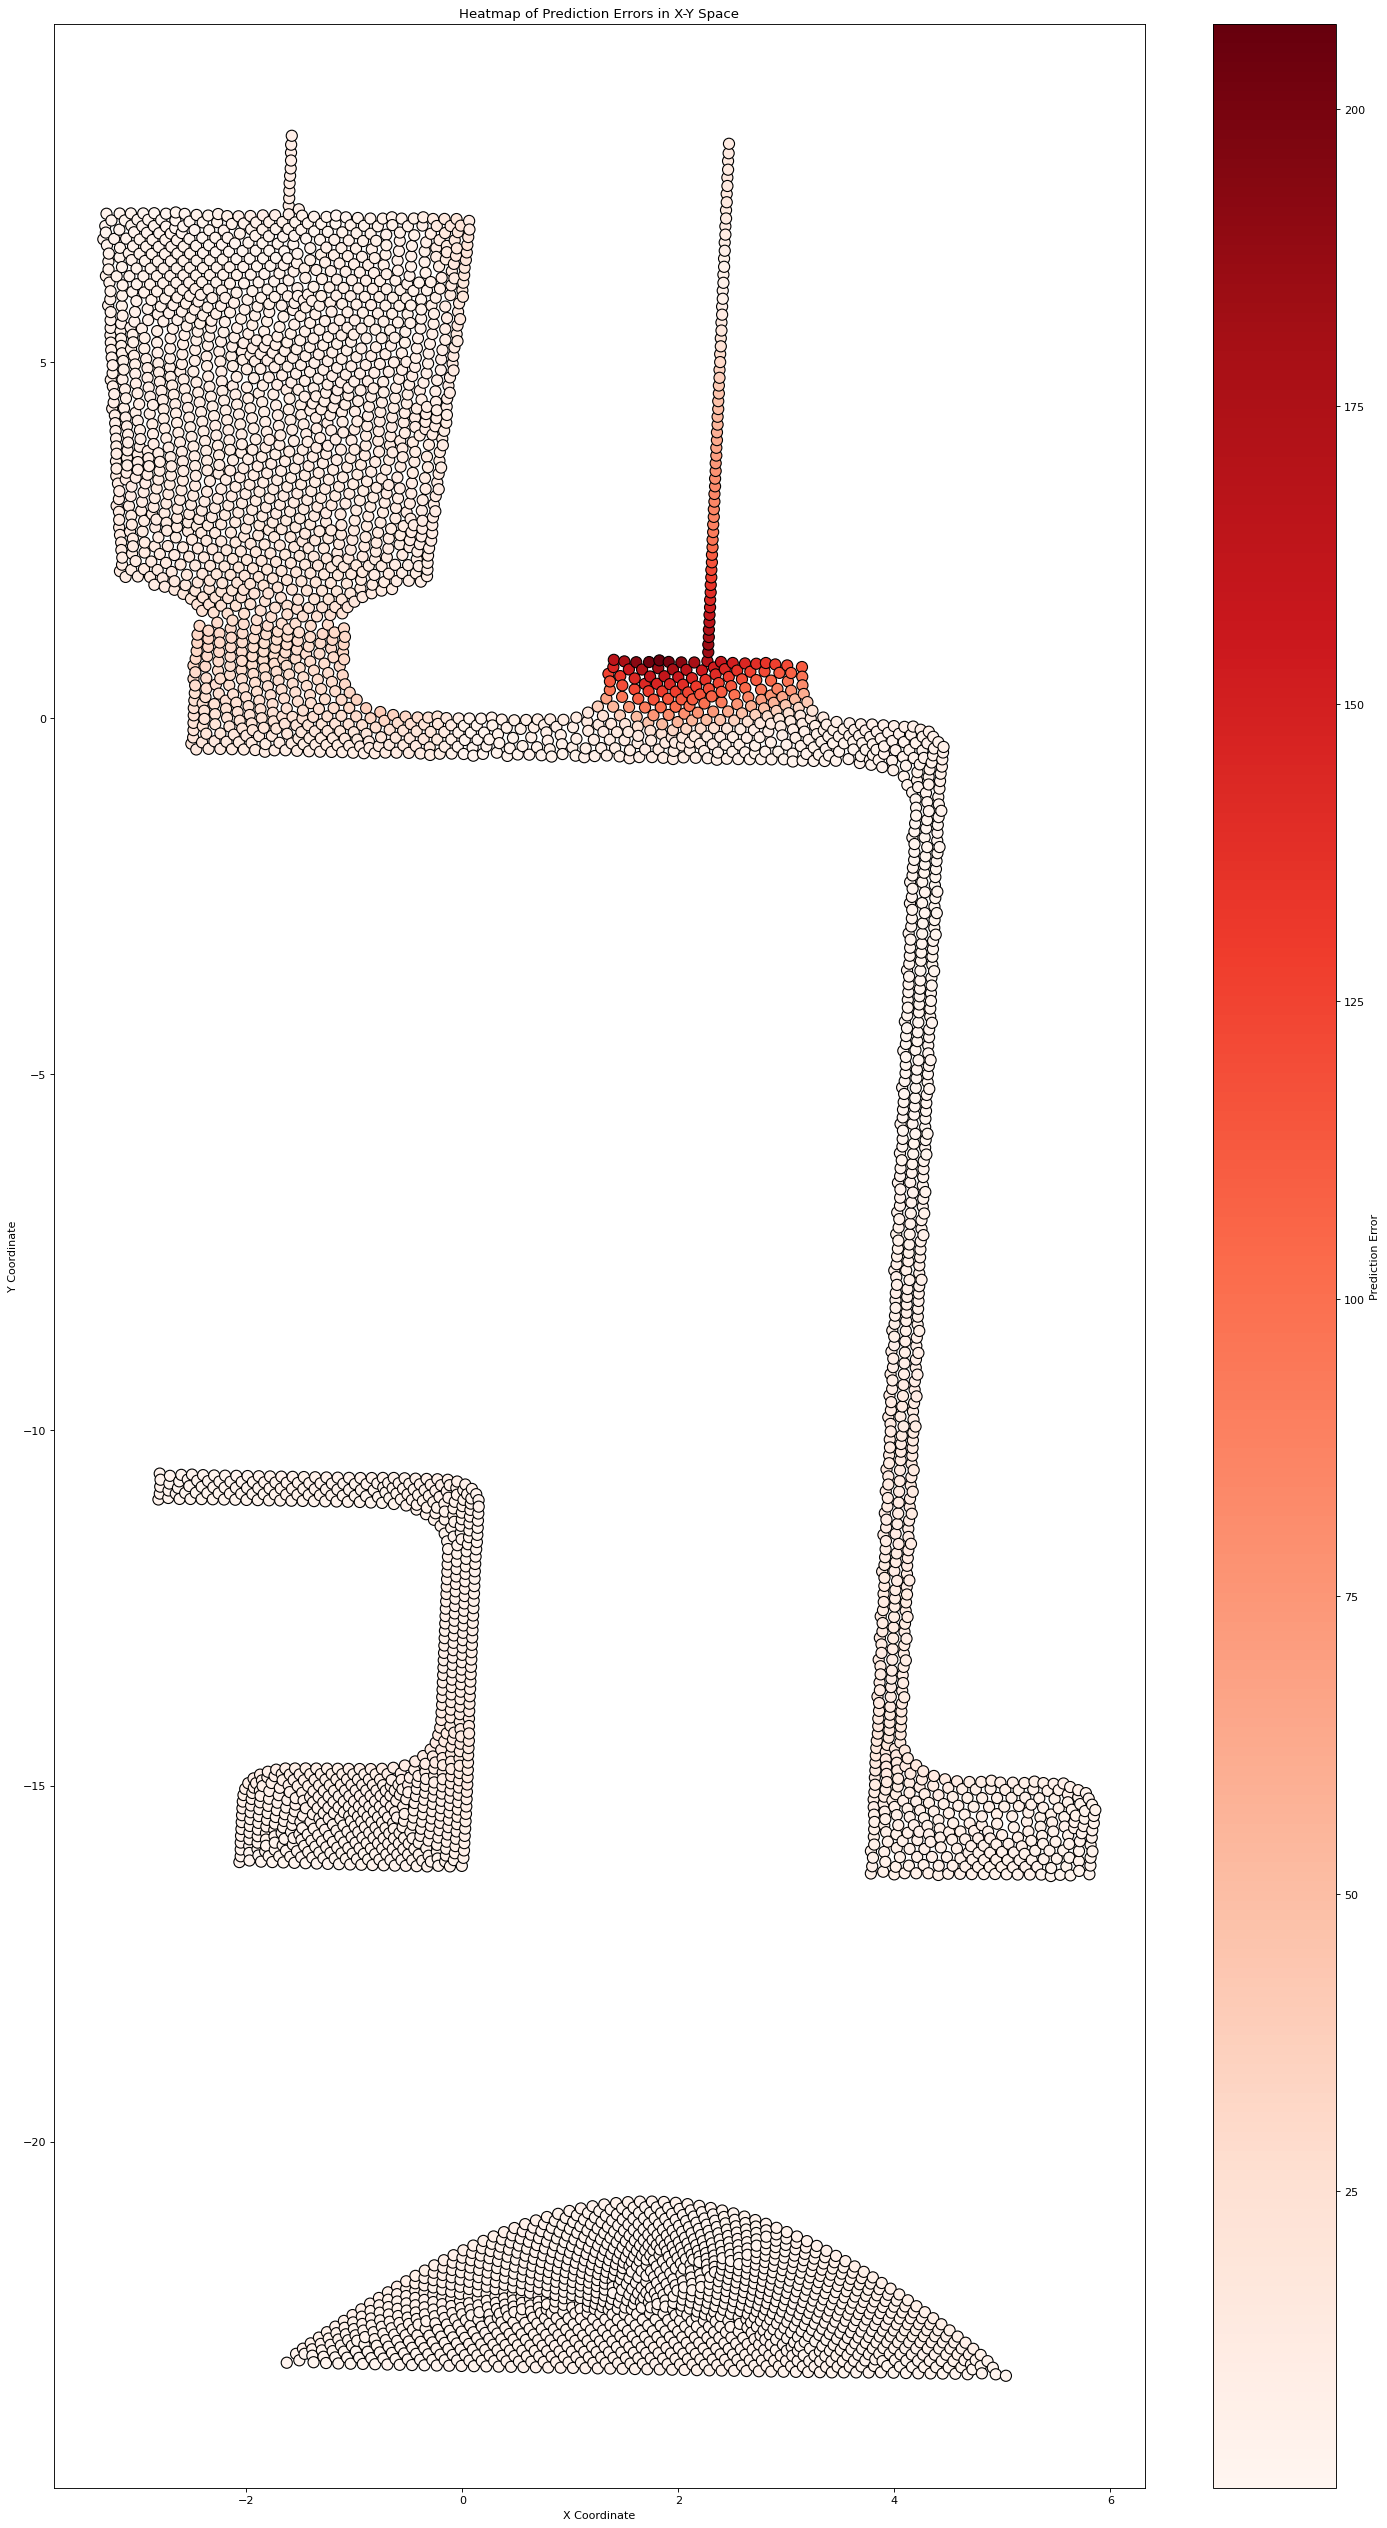

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Error
error = np.abs(real_data[['TempState1', 'TempState27251', 'TempState29001']] - 
               predicted_data[['TempState1', 'TempState27251', 'TempState29001']])
error['TotalError'] = error.sum(axis=1)  # Sum across all states

# Scatter Plot with Heatmap Colors
plt.figure(figsize=(22, 40),dpi=80)
scatter = plt.scatter(real_data['X'], real_data['Y'], c=error['TotalError'], cmap='Reds', edgecolor='k', s=100)
plt.colorbar(scatter, label="Prediction Error")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Heatmap of Prediction Errors in X-Y Space")

plt.show()

real_data values for this step 0       876.19763
1       874.94710
2       875.69250
3       879.31384
4       873.61816
          ...    
4622    873.12680
4623    872.33160
4624    873.06120
4625    872.98926
4626    872.75540
Name: TempState1501, Length: 4627, dtype: float64
predicted_data values for this step 0       872.586596
1       867.740359
2       870.456613
3       881.538112
4       863.036687
           ...    
4622    872.933648
4623    872.609959
4624    873.030554
4625    873.078850
4626    873.106735
Name: TempState1501, Length: 4627, dtype: float64
Error values for this step 0        3.611034
1        7.206741
2        5.235887
3        2.224272
4       10.581473
          ...    
4622     0.193152
4623     0.278359
4624     0.030646
4625     0.089590
4626     0.351335
Name: TempState1501, Length: 4627, dtype: float64


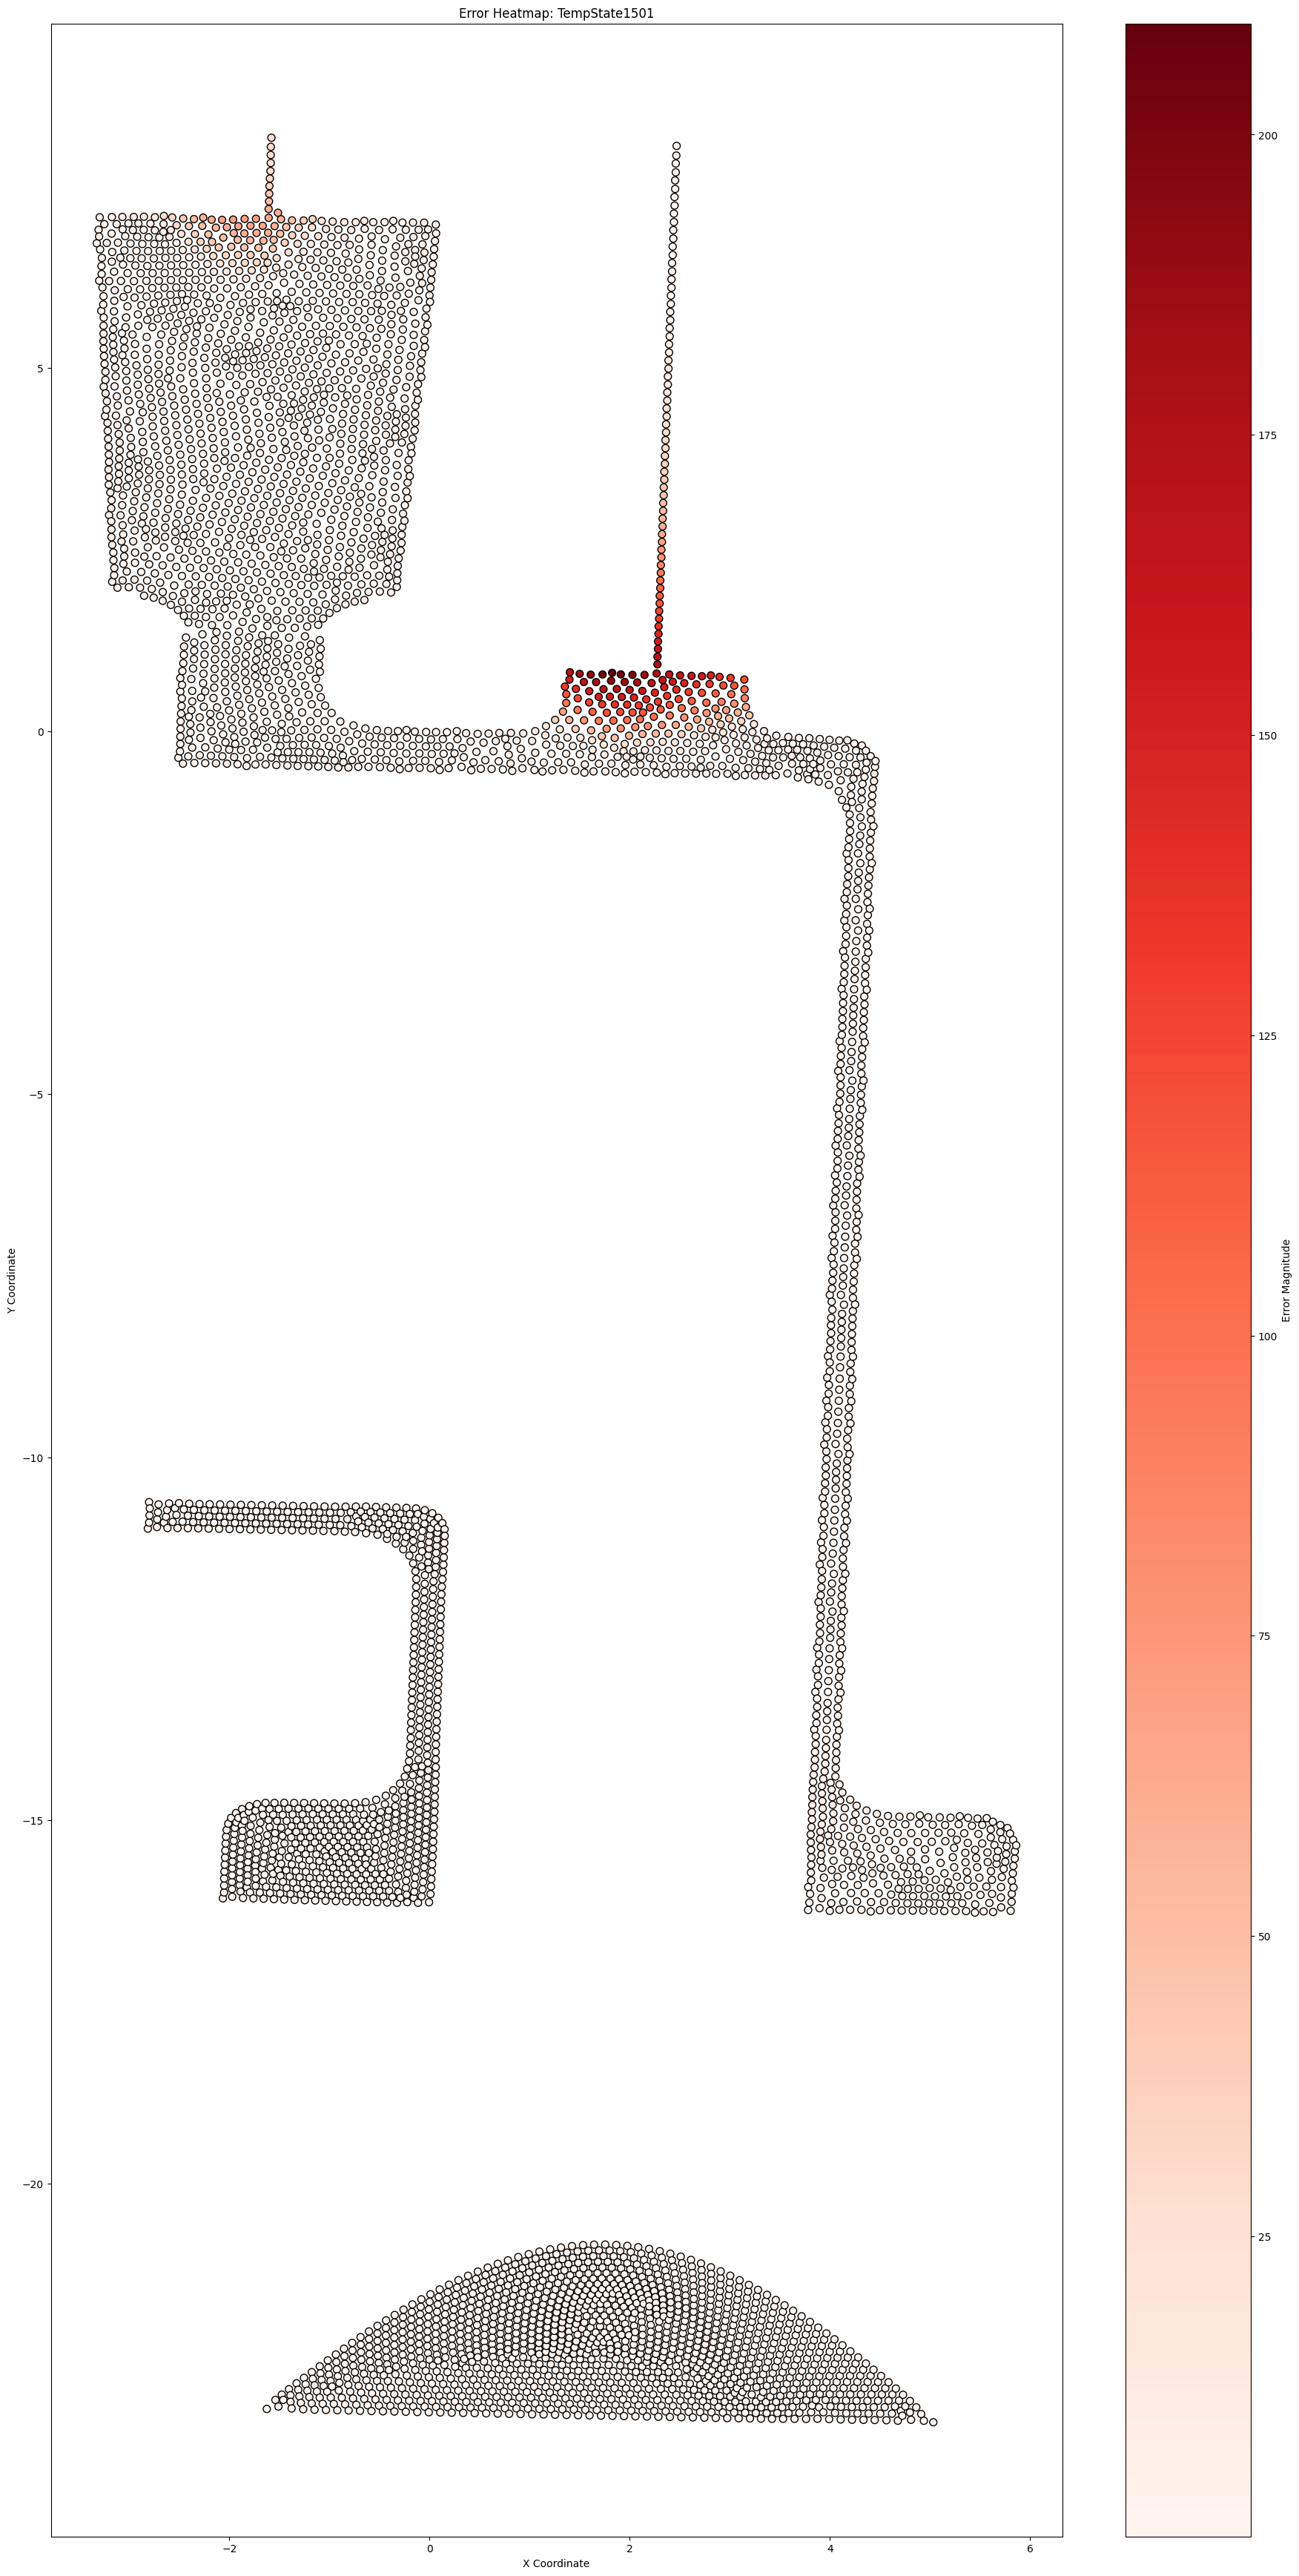

In [55]:
state_name = 'TempState1501'
print('real_data values for this step',real_data[state_name])
print('predicted_data values for this step',predicted_data[state_name])

# Compute Error
error = np.abs(real_data[state_name] - predicted_data[state_name])

print('Error values for this step',error)

# Plot
plt.figure(figsize=(22, 44))
scatter = plt.scatter(real_data['X'], real_data['Y'], c=error, cmap='Reds', edgecolor='k', s=50)



plt.colorbar(scatter, label="Error Magnitude")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Error Heatmap: {state_name}")

plt.show()

In [35]:
# Compute Error

ME= np.abs(real_data[[state_name]] - predicted_data[[state_name]])
RSE= np.abs(real_data[[state_name]] - predicted_data[[state_name]])/real_data[[state_name]]
RMSE= np.sqrt(np.mean((real_data[[state_name]] - predicted_data[[state_name]])**2))


print('Mean Error:',ME.mean())  
print('Relative Squared Error:',RSE.mean())
print('Root Mean Squared Error:',RMSE)  


Mean Error: TempState6251    6.635478
dtype: float64
Relative Squared Error: TempState6251    0.008207
dtype: float64
Root Mean Squared Error: 21.55161158373513
